# DC8 Nominal Cruising Speeds
In this notebook we explore KORUS-AQ flights to charaterize typical DC8 speeds.

In [1]:
import os  
import sys

sys.path.append('/home/adasilva/swdev/Notebooks')

import numpy  as np
import xarray as xr
import pyproj as pj
import pandas as pd

import pyobs  as po
from pyobs.icartt import ICARTT

import matplotlib.pyplot as plt

from glob    import glob

%matplotlib inline


## KORUS-AQ Flights

In [2]:
dirn = '/discover/nobackup/projects/gmao/iesa/pub/campaigns/KORUS-AQ/sampled/DC8/MERRA-2/'
Files = sorted(glob(dirn + '????-??-??/KORUSAQ-MERRA2-slv-Nx-DC8_Model_????????_R0.nc'))

In [3]:
K = xr.open_mfdataset(Files)
time, lon, lat = K['time'][:].values, K['trjLon'][:].values, K['trjLat'][:].values
K

<xarray.Dataset>
Dimensions:   (time: 9939, x: 1, y: 1)
Coordinates:
  * time      (time) datetime64[ns] 2016-05-01T23:05:30 ... 2016-06-18T22:46:30
  * x         (x) float32 0.0
  * y         (y) float32 0.0
Data variables: (12/50)
    trjLon    (time) float32 dask.array<chunksize=(470,), meta=np.ndarray>
    trjLat    (time) float32 dask.array<chunksize=(470,), meta=np.ndarray>
    isotime   (time) |S19 dask.array<chunksize=(470,), meta=np.ndarray>
    TOX       (time) float32 dask.array<chunksize=(470,), meta=np.ndarray>
    Q250      (time) float32 dask.array<chunksize=(470,), meta=np.ndarray>
    U10M      (time) float32 dask.array<chunksize=(470,), meta=np.ndarray>
    ...        ...
    V850      (time) float32 dask.array<chunksize=(470,), meta=np.ndarray>
    T250      (time) float32 dask.array<chunksize=(470,), meta=np.ndarray>
    T500      (time) float32 dask.array<chunksize=(470,), meta=np.ndarray>
    V50M      (time) float32 dask.array<chunksize=(470,), meta=np.ndarray>
    TO3       (time) float32 dask.array<chunksize=(470,), meta=np.ndarray>
    PBLTOP    (time) float32 dask.array<chunksize=(470,), meta=np.ndarray>
Attributes:
    title:        GEOS-5 Trajectory Sampler
    institution:  NASA/Goddard Space Flight Center
    source:       Global Model and Assimilation Office
    history:      Created from GEOS-5 standard collections by trj_sampler.py
    references:   n/a
    comment:      This file contains GEOS-5 related parameters along a satell...
    contact:      Arlindo da Silva <arlindo.dasilva@nasa.gov>
    Conventions:  CF
    trjFile:      /discover/nobackup/rgovinda/KORUSAQ/archive/60_SECOND.DC8_M...

## DC-8 Speeds

In [4]:
geod = pj.Geod(ellps='WGS84')
_, _, dist = geod.inv(lon[0:-1],lat[0:-1],lon[1:],lat[1:])
dt_ = (time[1:] - time[0:-1])
dt = dt_ / np.timedelta64(1, 's')
tm = time[0:-1] + dt_/2
speed = dist / dt

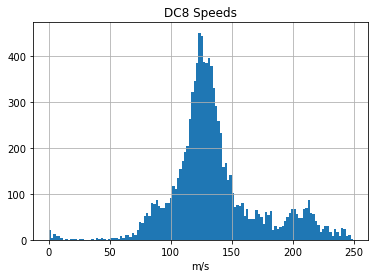

In [5]:
ax = plt.hist(speed,128),plt.xlabel('m/s'), plt.title('DC8 Speeds'), plt.grid()

In [6]:
ts = pd.Series(speed,index=tm)
ts.describe()

count    9938.000000
mean      135.721212
std        36.650813
min         0.000655
25%       116.902734
50%       129.332620
75%       146.774540
max       249.321318
dtype: float64